In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('C:/Users/ABC/Downloads/pakwheels.csv')

In [3]:
# We will be cleaning data first (handling missing values by imputation, standardizing etc)

In [4]:
print("shape:", df.shape)
display(df.head(5))

shape: (89956, 17)


,Unnamed: 0,ad_url,title,location,model_year,price,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,ad_last_updated,car_features,description
0,0,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,Islamabad Islamabad,2007.0,PKR 16.5 lacs,"100,000 km",Petrol,Automatic,Lahore,Grey,Imported Cars,1800 cc,Sedan,9-Oct-22,ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,2007 model full option Chat piller geniune or ...
1,1,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2012,"Eden Gardens, Faisalabad Punjab",2012.0,PKR 7 lacs,"100,000 km",Petrol,Manual,Faisalabad,Grey,Imported Cars,800 cc,Hatchback,9-Oct-22,AM/FM Radio\nCD Player\nImmobilizer Key,"Very smooth drive,70% in orignal paint rest of..."
2,2,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic EX 1995,"Bostan Road, Rawalpindi Punjab",1995.0,PKR 7.6 lacs,999 km,Petrol,Manual,Lahore,Black,Imported Cars,1500 cc,Sedan,9-Oct-22,AM/FM Radio\nAir Conditioning\nAlloy Rims\nCas...,1600cc Engine installed Alloy RimsAir Conditio...
3,3,https://www.pakwheels.com/used-cars/toyota-for...,Toyota Fortuner 2.7 VVTi 2013,"Kallar Kahar Road, Chakwal Punjab",2013.0,PKR 70 lacs,"94,000 km",Petrol,Automatic,Lahore,Black,Imported Cars,2700 cc,SUV,9-Oct-22,ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,Inside out fully original. Original return fil...
4,4,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2015,Muzaffar Gargh Punjab,2015.0,PKR 8 lacs,"86,000 km",Petrol,Manual,Multan,Grey,Imported Cars,796 cc,Hatchback,9-Oct-22,AM/FM Radio\nCD Player\nImmobilizer Key,gari total genion hy.chill a.c.new tires.no wo...


In [5]:
# Duplicates check
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [6]:
# handling of prices columns (it's categorical with strings like pkr, lakhs & crore)
def convert_price(x):
    x = str(x).lower().replace('pkr','').strip()
    if 'call' in x:
        return np.nan
    elif 'lacs' in x:
        x = x.replace('lacs','').strip()
        try:
            return float(x) * 100000  # 1 lac = 100,000
        except:
            return np.nan
    elif 'crores' in x:
        x = x.replace('crores','').strip()
        try:
            return float(x) * 10000000  # 1 crore = 10,000,000
        except:
            return np.nan
    else:
        # If already numeric
        try:
            return float(x)
        except:
            return np.nan
df['price'] = df['price'].apply(convert_price)

In [7]:
# Conversion of Mileage & Engine capacity conversion 
df['mileage'] = df['mileage'].astype(str).str.replace(',', '').str.replace(' km','').str.strip()
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

df['engine_capacity'] = df['engine_capacity'].astype(str).str.replace(' cc','').str.strip()
df['engine_capacity'] = pd.to_numeric(df['engine_capacity'], errors='coerce')

In [8]:
# standardization of catergorical columns
df['assembly'] = df['assembly'].replace({'Imported Cars':'Imported'})

df['color'] = df['color'].astype(str).str.strip().str.title()
df['color'] = df['color'].replace('Nan', np.nan)

df['transmission'] = df['transmission'].astype(str).str.strip().str.title()
df['engine_type'] = df['engine_type'].astype(str).str.strip().str.title()
df['engine_type'] = df['engine_type'].replace('Nan', np.nan)

df['unregistered'] = df['registered_in'].str.contains('Un-Registered', na=False)
df['registered_in'] = df['registered_in'].replace('Un-Registered', np.nan)

df['body_type'] = df['body_type'].astype(str).str.strip()
df['body_type'] = df['body_type'].replace('nan', np.nan)

In [9]:
df['ad_last_updated'] = pd.to_datetime(df['ad_last_updated'], format='%d-%b-%y', errors='coerce')

In [10]:
num_cols = ['price','mileage','engine_capacity','model_year']
for c in num_cols:
    df[c].fillna(df[c].median(), inplace=True)

cat_cols = ['color','engine_type','body_type']
for c in cat_cols:
    df[c].fillna(df[c].mode()[0], inplace=True)

df['car_features'].fillna('Not listed', inplace=True)

C:\Users\ABC\AppData\Local\Temp\ipykernel_3004\871173175.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)
C:\Users\ABC\AppData\Local\Temp\ipykernel_3004\871173175.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [11]:
df['car_features'] = df['car_features'].str.replace('\n',' | ')
df['description'] = df['description'].str.replace('\n',' ')

In [12]:
df['registered_in'].fillna('Unknown', inplace=True)
df['location'].fillna('Unknown', inplace=True)
df['description'].fillna('Not provided', inplace=True)

C:\Users\ABC\AppData\Local\Temp\ipykernel_3004\545472486.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['registered_in'].fillna('Unknown', inplace=True)
C:\Users\ABC\AppData\Local\Temp\ipykernel_3004\545472486.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [13]:
# Quick summary
print(df.describe())  
print(df.describe(include='object'))  

         Unnamed: 0    model_year         price         mileage  \
count  89956.000000  89956.000000  8.995600e+04    89956.000000   
mean   44977.500000   2012.921173  2.523162e+06    84271.388812   
min        0.000000   1990.000000  1.000000e+05        1.000000   
25%    22488.750000   2007.000000  1.200000e+06    20000.000000   
50%    44977.500000   2015.000000  2.095000e+06    74000.000000   
75%    67466.250000   2019.000000  3.300000e+06   120000.000000   
max    89955.000000   2022.000000  1.000000e+07  1000000.000000   
std    25968.204745      7.570045  1.824173e+06    90456.669439   

       engine_capacity                ad_last_updated  
count     89956.000000                          89954  
mean       1406.015630  2022-09-21 20:12:36.226515712  
min         100.000000            2020-10-10 00:00:00  
25%        1000.000000            2022-09-11 00:00:00  
50%        1300.000000            2022-09-25 00:00:00  
75%        1600.000000            2022-10-03 00:00:00  
max 

In [14]:
# Data is cleaned now!!!

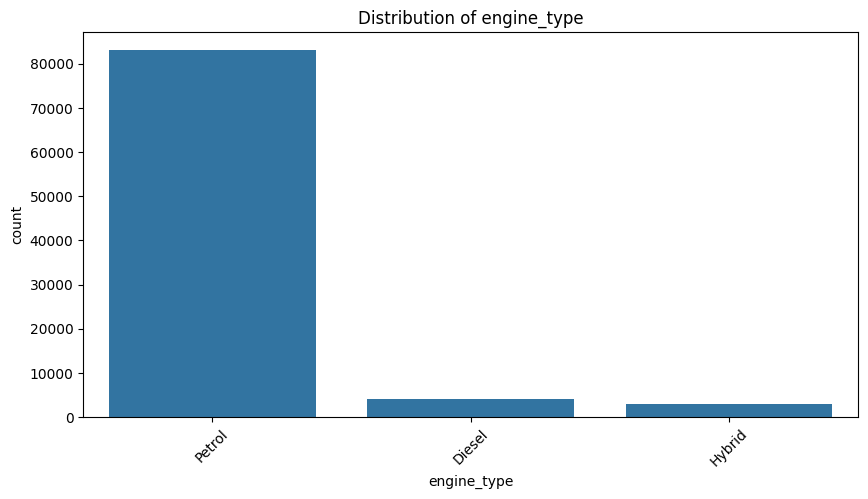

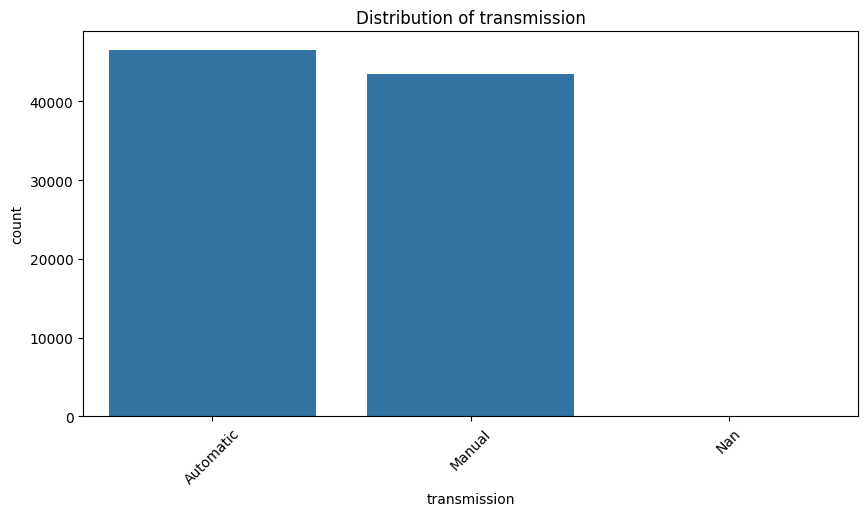

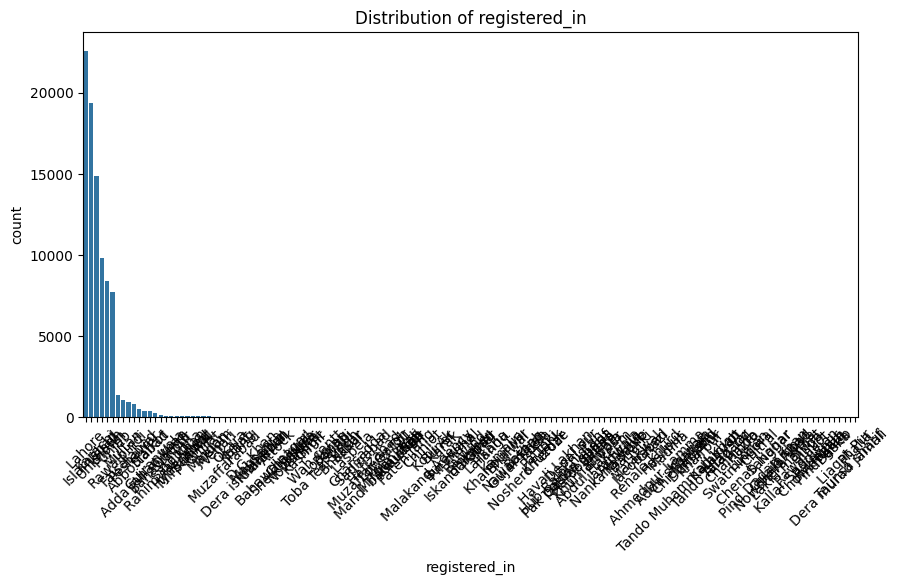

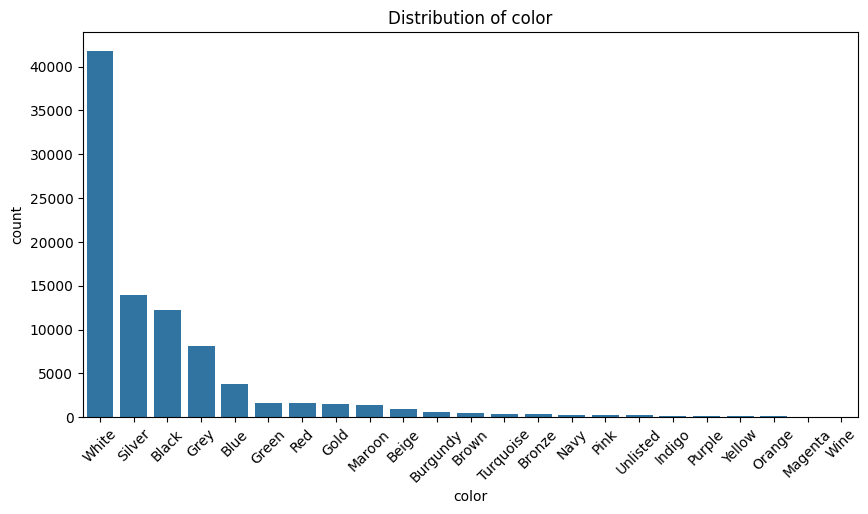

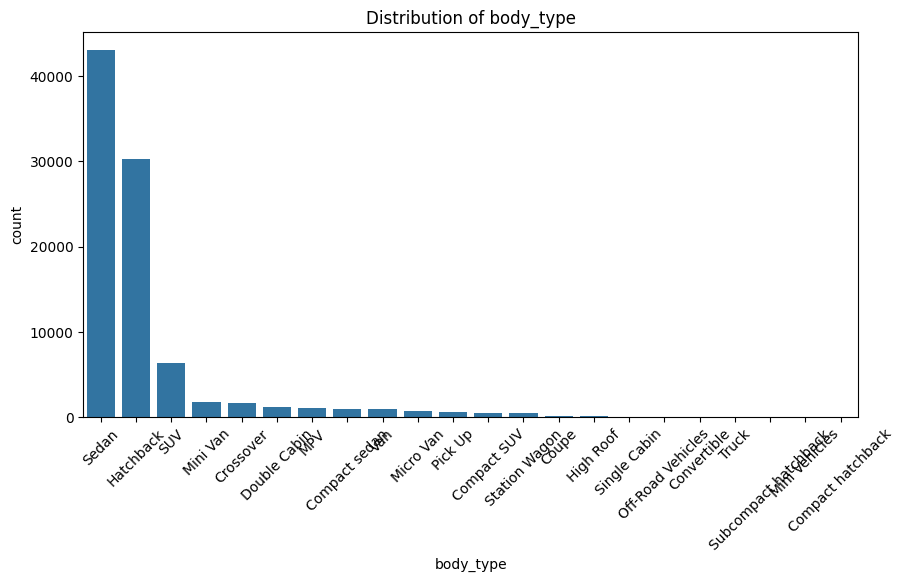

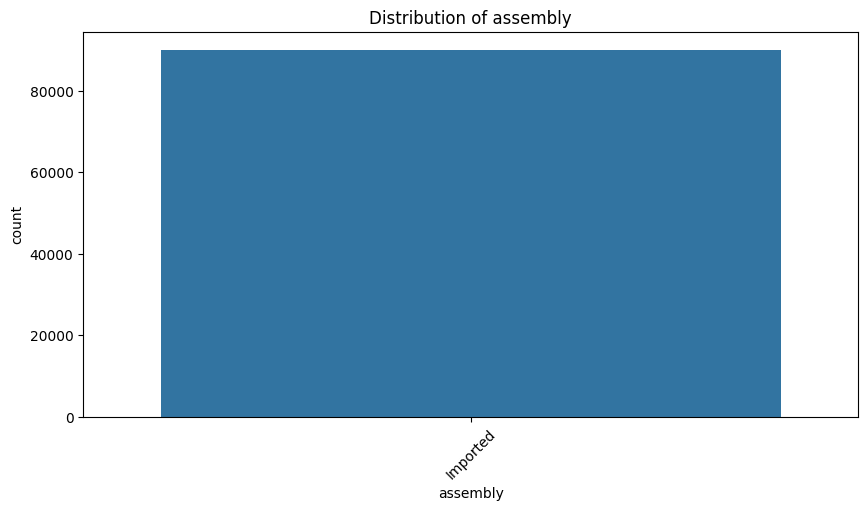

In [15]:
categorical_cols = ['engine_type', 'transmission', 'registered_in', 'color', 'body_type', 'assembly']

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

              price         mileage  engine_capacity    model_year
count  8.995600e+04    89956.000000     89956.000000  89956.000000
mean   2.523162e+06    84271.388812      1406.015630   2012.921173
std    1.824173e+06    90456.669439       736.462743      7.570045
min    1.000000e+05        1.000000       100.000000   1990.000000
25%    1.200000e+06    20000.000000      1000.000000   2007.000000
50%    2.095000e+06    74000.000000      1300.000000   2015.000000
75%    3.300000e+06   120000.000000      1600.000000   2019.000000
max    1.000000e+07  1000000.000000     15000.000000   2022.000000


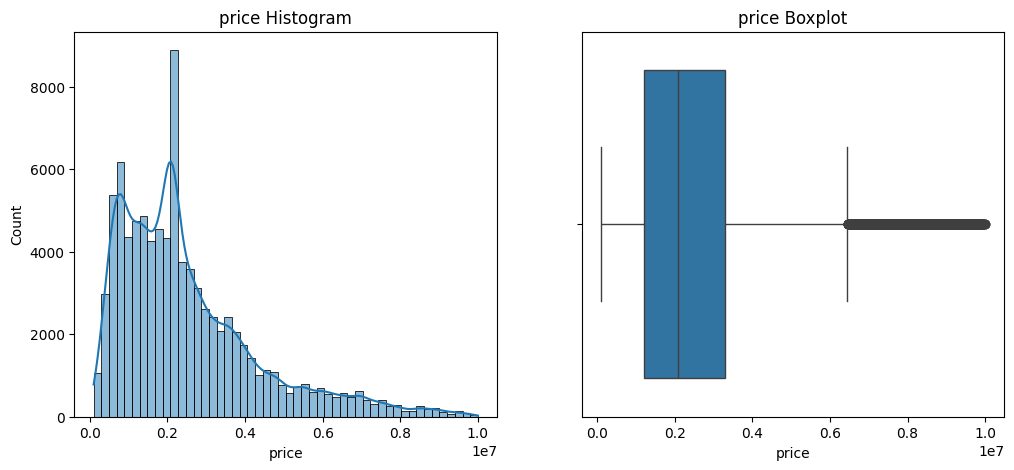

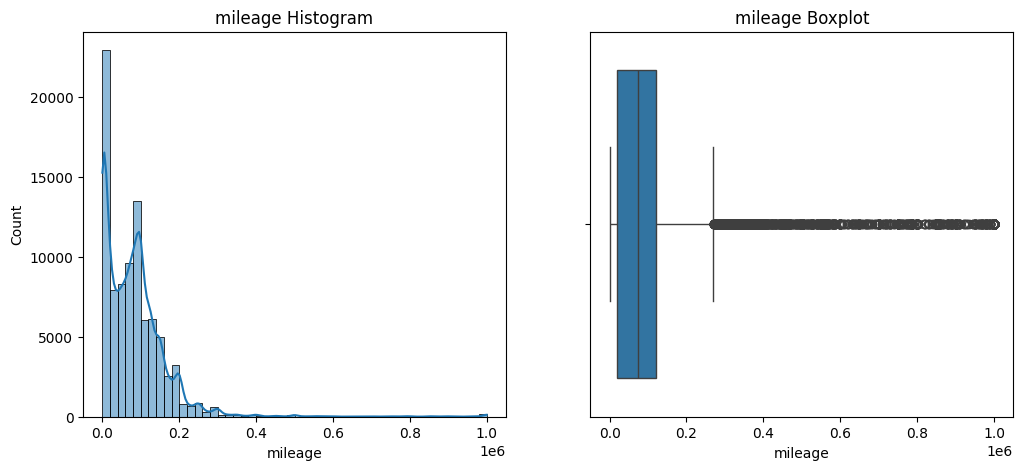

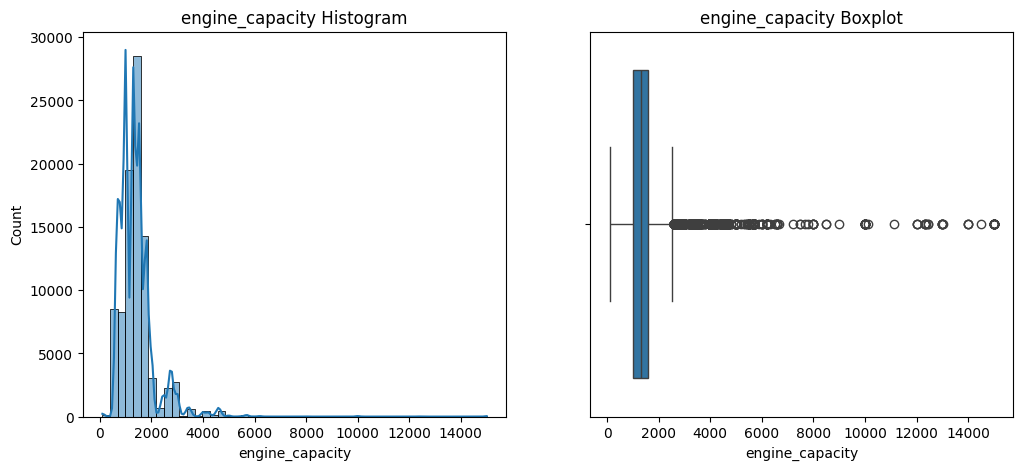

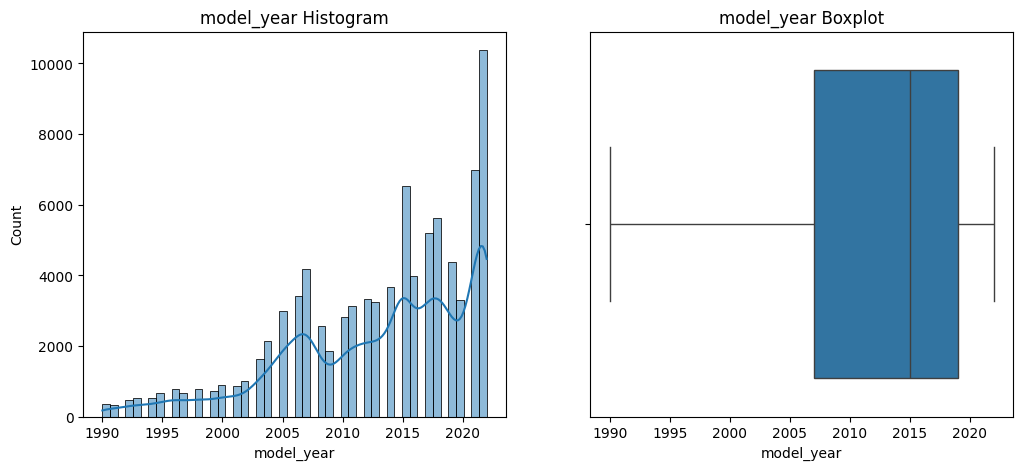

In [16]:
# Numeric columns
numeric_cols = ['price','mileage','engine_capacity','model_year']

print(df[numeric_cols].describe())  # Mean, Median, SD, min, max, 

# Histograms & Boxplots
for col in numeric_cols:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'{col} Histogram')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
    
    plt.show()

In [17]:
# Tests if average car price differs from 2.5M PKR.
pop_mean = 2500000  # hypothesized mean
sample_mean = df['price'].mean()
sample_std = df['price'].std()
n = len(df)

# t-test
t_stat, p_value = stats.ttest_1samp(df['price'], pop_mean)

# 95% CI
se = sample_std / np.sqrt(n)
ci_lower = sample_mean - 1.96*se
ci_upper = sample_mean + 1.96*se

print(f"t-statistic: {t_stat}, p-value: {p_value}")
print(f"95% Confidence Interval: ({ci_lower}, {ci_upper})")

t-statistic: 3.8082618544943894, p-value: 0.00014003989633431106
95% Confidence Interval: (2511241.245930477, 2535082.934780093)


In [18]:
# p-value < 0.05 → reject null hypothesis.

In [20]:
# Compares mean price of petrol vs diesel.
petrol_prices = df[df['engine_type']=='Petrol']['price']
diesel_prices = df[df['engine_type']=='Diesel']['price']

t_stat, p_value = stats.ttest_ind(petrol_prices, diesel_prices, equal_var=False)  # Welch’s t-test

print(f"T-statistic: {t_stat}, p-value: {p_value}")
# Significant p-value → mean prices are different.

T-statistic: -20.391757941088734, p-value: 2.544264388817661e-88


In [21]:
# Bin model_year into 3 groups
bins = [0, 2010, 2015, 2030]
labels = ['<=2010', '2011-2015', '>=2016']
df['year_group'] = pd.cut(df['model_year'], bins=bins, labels=labels)

# Grouped prices
grouped_prices = [df[df['year_group']==grp]['price'] for grp in labels]

# Kruskal-Wallis test (non-parametric)
kw_stat, kw_p = stats.kruskal(*grouped_prices)
print(f"Kruskal-Wallis H-statistic: {kw_stat}, p-value: {kw_p}")

Kruskal-Wallis H-statistic: 34329.3578385092, p-value: 0.0


In [22]:
#low p value so null hypothesis rejected

In [23]:
alpha1 = 0.05
alpha2 = 0.01

print(f"Reject H0 at 5%? {'Yes' if kw_p < alpha1 else 'No'}")
print(f"Reject H0 at 1%? {'Yes' if kw_p < alpha2 else 'No'}")

Reject H0 at 5%? Yes
Reject H0 at 1%? Yes


In [24]:
# Both α = 0.05 and α = 0.01 reject null. Changing significance level did not affect conclusion.

                    price   mileage  engine_capacity  model_year
price            1.000000 -0.271549         0.373108    0.507563
mileage         -0.271549  1.000000         0.035239   -0.432817
engine_capacity  0.373108  0.035239         1.000000   -0.063395
model_year       0.507563 -0.432817        -0.063395    1.000000


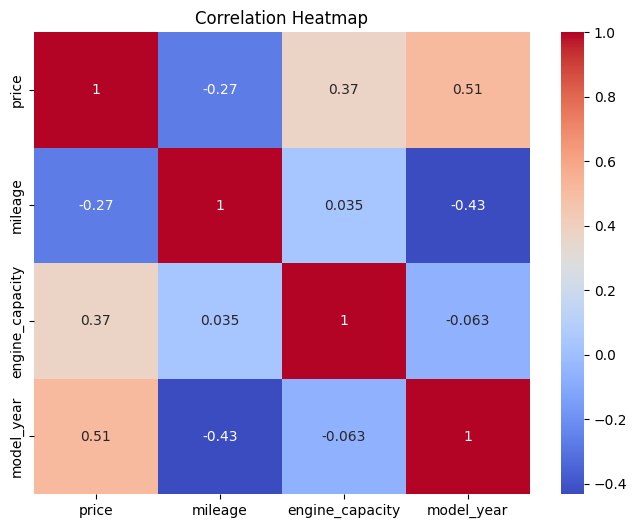

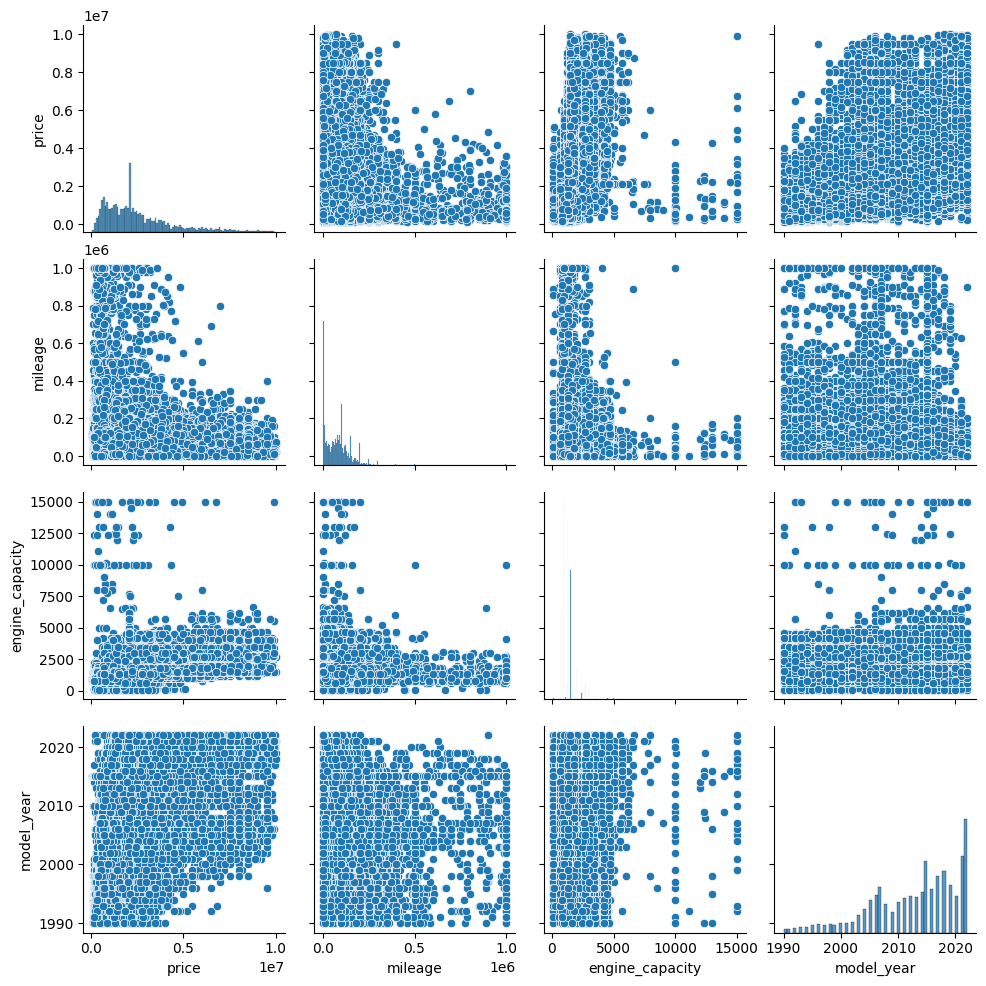

In [25]:
numeric_cols = ['price', 'mileage', 'engine_capacity', 'model_year']

# Correlation matrix
corr = df[numeric_cols].corr()
print(corr)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
sns.pairplot(df[numeric_cols])
plt.show()

In [26]:
# Bootstrap 95% CI for mean price
boot_means = []
for _ in range(1000):
    sample = df['price'].sample(frac=1, replace=True)
    boot_means.append(sample.mean())

boot_ci = np.percentile(boot_means, [2.5, 97.5])
print(f"Bootstrap 95% CI: {boot_ci}")

Bootstrap 95% CI: [2511034.82647072 2534847.88090844]


In [27]:
# The t-test 95% CI for mean price is 2,511,241–2,535,083 PKR, while the bootstrap CI is 2,511,035–2,534,848 PKR. 
# Both indicate the mean price is significantly above 2,500,000 PKR. 
#The similarity occurs because the large sample size makes the mean distribution approximately normal. Bootstrapping confirms the result.